In [35]:
import pandas as pd
import numpy as np
import sqlite3
sqlite3.sqlite_version

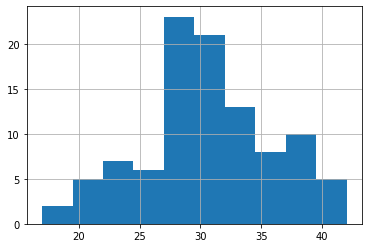

In [12]:
pd.Series(np.random.poisson(30, size=100)).hist()

In [60]:
dt = pd.DataFrame({'dt': pd.date_range('2020-04-01', '2020-05-31')})
dt['num'] = np.random.poisson(30, size=len(dt))

In [92]:
df = pd.DataFrame({'sale_dttm': (dt['dt'].apply(lambda x: [x])* dt['num']).sum()})
df['card_number'] = pd.Series(list(range(40))+[np.nan]*10).sample(df.shape[0], replace=True).values
df['coffee_type'] = pd.Series(['espresso', 'americano','cappuccino','cappuccino', 'cappuccino', 'latte']).sample(len(df),replace=True).values

In [93]:
coffee_price = pd.DataFrame({'espresso': [100] , 'americano': [120],'cappuccino': [130], 'latte': [150]}).T.reset_index()
coffee_price.columns = ['coffee_type', 'coffee_price']
df = df.merge(coffee_price, how='left', on='coffee_type')
df['discount'] = pd.Series([0,0,0,0,0,0.5,0.5,0.5,0.1,0.15]).sample(len(df),replace=True).values
df['grocery_flg'] = pd.Series([0,0,0,1]).sample(len(df),replace=True).values
df['price'] = (df['coffee_price'] + df['grocery_flg']*100)*(1-df['discount'])

In [94]:
df

,sale_dttm,card_number,coffee_type,coffee_price,discount,grocery_flg,price
0,2020-04-01,5.0,cappuccino,130,0.00,0,130.0
1,2020-04-01,27.0,cappuccino,130,0.00,0,130.0
2,2020-04-01,2.0,latte,150,0.50,0,75.0
3,2020-04-01,0.0,latte,150,0.00,0,150.0
4,2020-04-01,38.0,americano,120,0.50,0,60.0
...,...,...,...,...,...,...,...
1819,2020-05-31,12.0,americano,120,0.00,0,120.0
1820,2020-05-31,27.0,latte,150,0.00,1,250.0
1821,2020-05-31,27.0,latte,150,0.15,1,212.5
1822,2020-05-31,3.0,cappuccino,130,0.10,0,117.0


In [95]:
con = sqlite3.connect('db')

In [96]:
df.to_sql('coffee_sales', con, index=False, if_exists='replace')

In [66]:
sql = ''' select * from coffee_sales t limit 10 '''

In [68]:
def select (sql):
  return pd.read_sql(sql,con)

In [99]:
sql = ''' select month, avg(price) as mean, 
          from (select date(t.sale_dttm, 'start of month') as month, t.card_number, sum(t.price) as price
                from coffee_sales t
                group by date(t.sale_dttm, 'start of month'), t.card_number)
          group by month'''


In [100]:
select (sql)

,month,mean
0,2020-04-01,2729.719512
1,2020-05-01,2848.219512
